# Simulating logic gates using `crysx_nn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Import CrysX_nn related stuff

# Import loss functions
from crysx_nn.loss import MSE_loss, MSE_loss_grad
from crysx_nn.loss import BCE_loss, BCE_loss_grad
# Import neural network functions
from crysx_nn.network import nn_optimize_fast
from crysx_nn.network import visualize
from crysx_nn.network import forward_feed

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Define some network parameters that we will be using later on

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
eeta = 0.5
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Visualize the network

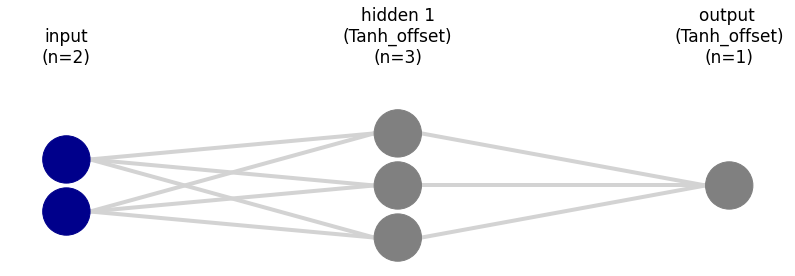

In [3]:
visualize(nInputs, neurons_per_layer, activation_func_names)

## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [4]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [5]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [6]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## Generate initial weights and biases

In [7]:
from crysx_nn.network import init_params
weightsOriginal, biasesOriginal = init_params(nInputs, neurons_per_layer, method='Xavier')
print('Weights matrices: \n', weightsOriginal)
print('Biases: \n', biasesOriginal)

Weights matrices: 
 [array([[ 0.25591067,  0.53764406],
       [-0.08837285, -0.04159074],
       [ 0.53254541, -0.0698623 ]]), array([[0.4937847 , 0.22408043, 0.53364015]])]
Biases: 
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [8]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [9]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.4941920988207942


### Visualize the training loss

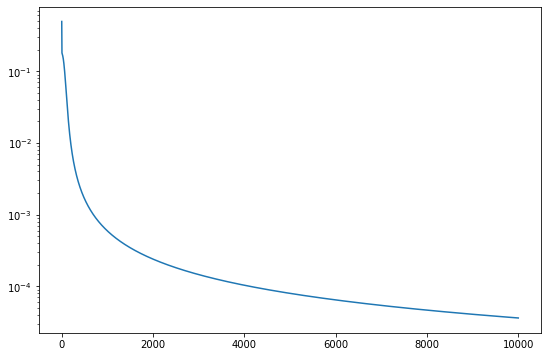

In [10]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [11]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 1.43316341,  1.56844478],
       [-1.16898867, -1.23513041],
       [ 1.35839205,  1.13064868]]), array([[ 3.1833121 , -2.88742126,  2.53377804]])]
Optimized Biases:  [array([-2.1628245 ,  1.69670397, -1.76078267]), array([-1.77522732])]


### Make predictions using the optimized weights

In [12]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.01305235, 0.96749788, 0.02870482],
       [0.23348088, 0.71568292, 0.22092776],
       [0.18857102, 0.74181636, 0.30900369],
       [0.84258214, 0.19547332, 0.81099924]]), array([[1.35143279e-04],
       [6.19768840e-03],
       [6.25640828e-03],
       [9.91796082e-01]])]
Inputs at each layer :
  [array([[-2.1628245 ,  1.69670397, -1.76078267],
       [-0.59437972,  0.46157356, -0.63013399],
       [-0.7296611 ,  0.5277153 , -0.40239062],
       [ 0.83878369, -0.70741511,  0.72825805]]), array([[-4.45451993],
       [-2.53868096],
       [-2.53393648],
       [ 2.39745286]])]
New Average Error with optimized weights:
 3.6219128685663396e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[1.35143279e-04]
 [6.19768840e-03]
 [6.25640828e-03]
 [9.91796082e-01]]
Expected Output:  [[0.]
 [0.]
 [0.]
 [1.]]


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [13]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputNAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.21132476853556212


### Visualize the training loss

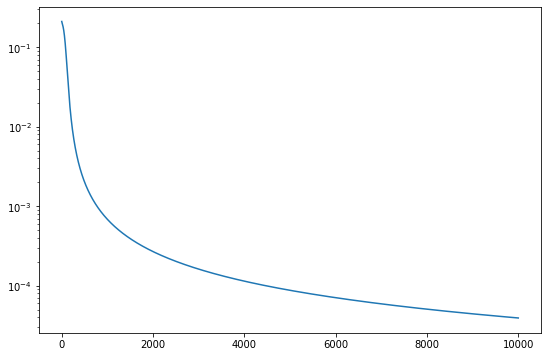

In [14]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [15]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 0.90667338,  1.00218951],
       [-1.84203945, -1.57978137],
       [-1.13194424, -1.34895649]]), array([[-2.48586749,  3.82444912,  2.5854256 ]])]
Optimized Biases:  [array([-1.054241  ,  2.33915945,  1.56806341]), array([-0.97521519])]


### Make predictions using the optimized weights

In [16]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputNAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputNAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.10827514, 0.99079097, 0.95835859],
       [0.47399773, 0.82035525, 0.60783334],
       [0.42674714, 0.72992459, 0.70521124],
       [0.84673817, 0.10290803, 0.13875435]]), array([[0.99995661],
       [0.99400495],
       [0.9942772 ],
       [0.00941887]])]
Inputs at each layer :
  [array([[-1.054241  ,  2.33915945,  1.56806341],
       [-0.0520515 ,  0.75937808,  0.21910692],
       [-0.14756762,  0.49712   ,  0.43611917],
       [ 0.85462188, -1.08266137, -0.91283732]]), array([[ 5.02262162],
       [ 2.55540404],
       [ 2.5787786 ],
       [-2.32778851]])]
New Average Error with optimized weights:
 3.935200813654528e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.99995661]
 [0.99400495]
 [0.9942772 ]
 [0.00941887]]
Expected Output:  [[1.]
 [1.]
 [1.]
 [0.]]


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [17]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.17229811968211609


### Visualize the training loss

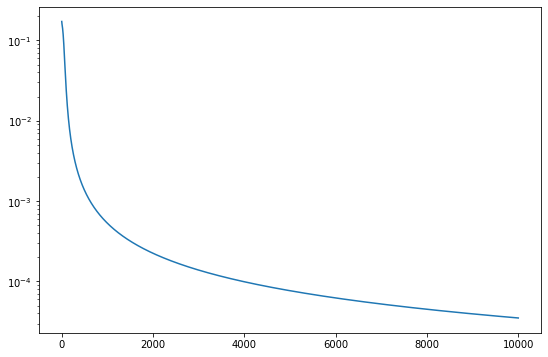

In [18]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 2.02815088,  2.13134698],
       [-0.6971973 , -0.69223835],
       [ 1.85268409,  1.74806574]]), array([[ 3.28930656, -1.46949545,  2.67075294]])]
Optimized Biases:  [array([-1.07546984,  0.40968278, -0.93880471]), array([-2.02558987])]


### Make predictions using the optimized weights

In [20]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.10424345, 0.69410165, 0.1326637 ],
       [0.89204039, 0.36236567, 0.8345912 ],
       [0.87049721, 0.36007721, 0.86149451],
       [0.99790908, 0.12352055, 0.99514988]]), array([[0.00904249],
       [0.99456904],
       [0.99461586],
       [0.99942826]])]
Inputs at each layer :
  [array([[-1.07546984,  0.40968278, -0.93880471],
       [ 1.05587714, -0.28255557,  0.80926103],
       [ 0.95268104, -0.28751452,  0.91387938],
       [ 3.08402802, -0.97975287,  2.66194512]]), array([[-2.34836846],
       [ 2.60509666],
       [ 2.60944948],
       [ 3.73312559]])]
New Average Error with optimized weights:
 3.514446188629844e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.00904249]
 [0.99456904]
 [0.99461586]
 [0.99942826]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [1.]]


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [21]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputXOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.35010493035870915


### Visualize the training loss

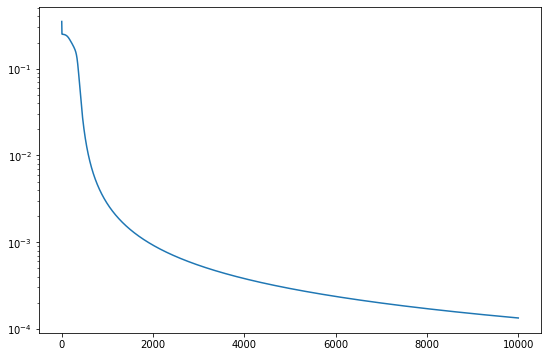

In [22]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [23]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[ 3.37862764,  3.36774344],
       [-0.26976856, -0.32924483],
       [ 2.42436415,  2.42020363]]), array([[ 5.18982444,  0.0233883 , -5.48656225]])]
Optimized Biases:  [array([-1.49381292,  0.02177776, -3.70793679]), array([-2.44530581])]


### Make predictions using the optimized weights

In [24]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputXOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputXOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[4.79880372e-02, 5.10887157e-01, 6.01264855e-04],
       [9.76974562e-01, 3.50934478e-01, 7.07341544e-02],
       [9.77459197e-01, 3.78485469e-01, 7.12830605e-02],
       [9.99972605e-01, 2.39673337e-01, 9.06638266e-01]]), array([[0.01242904],
       [0.98890696],
       [0.9889102 ],
       [0.0115587 ]])]
Inputs at each layer :
  [array([[-1.49381292,  0.02177776, -3.70793679],
       [ 1.87393051, -0.30746707, -1.28773316],
       [ 1.88481472, -0.2479908 , -1.28357264],
       [ 5.25255815, -0.57723563,  1.13663099]]), array([[-2.18760641],
       [ 2.24514108],
       [ 2.24528901],
       [-2.22434528]])]
New Average Error with optimized weights:
 0.0001335309518508381
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.01242904]
 [0.98890696]
 [0.9889102 ]
 [0.0115587 ]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [0.]]
